In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #ÂøΩËßÜË≠¶Âëä

plt.rcParams['font.sans-serif'] = ['SimHei']  # ‰∏≠ÊñáÂ≠ó‰ΩìËÆæÁΩÆ-Èªë‰Ωì
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥‰øùÂ≠òÂõæÂÉèÊòØË¥üÂè∑'-'ÊòæÁ§∫‰∏∫ÊñπÂùóÁöÑÈóÆÈ¢ò

import jieba
import jieba.analyse
from wordcloud import WordCloud
from snownlp import SnowNLP

import gensim
from gensim import corpora
from gensim.models import LdaModel

# ËØªÂèñÊï∞ÊçÆ

In [13]:
df = pd.read_csv(r"D:\work\github\public_opinion_data_analysis\the_queen_of_news_comments.csv")

# ÂàÜËØç

In [14]:
# ‰ΩøÁî®jiebaËøõË°å‰∏≠ÊñáÂàÜËØç
def chinese_segmentation(text):
    words = jieba.cut(text, cut_all=False, HMM=True)
    return " ".join(words)

In [15]:
# ‰ªéÂ§ñÈÉ®Êñá‰ª∂ËØªÂèñÂÅúÁî®ËØçÂàóË°®
jieba.analyse.set_stop_words("stopwords.txt")

In [16]:
# ÂØπDataFrameÁöÑ'comments'ÂàóÂ∫îÁî®‰∏≠ÊñáÂàÜËØç
df['comments_segmented'] = df['comments'].apply(chinese_segmentation)

In [17]:
# ÂØπÊâÄÊúâ'comments_segmented'ÊñáÊú¨ËøõË°åÊãºÊé•
all_comments_text = " ".join(df['comments_segmented'])

# ËØç‰∫ëÂàÜÊûê

In [18]:
# ÂàõÂª∫ËØç‰∫ëÔºåÂπ∂ÊéíÈô§ÂÅúÁî®ËØç
def generate_wordcloud(text):
    # ‰ΩøÁî® jieba.analyse.extract_tags ÊèêÂèñÂÖ≥ÈîÆËØç
    keywords = jieba.analyse.extract_tags(text, topK=100, withWeight=True, allowPOS=('n', 'nr', 'ns'))#allowPOS=('n', 'nr', 'ns')ÔºöË°®Á§∫‰ªÖËÄÉËôëÂêçËØçÔºà'n'Ôºâ„ÄÅ‰∫∫ÂêçÔºà'nr'Ôºâ„ÄÅÂú∞ÂêçÔºà'ns'ÔºâÁ≠âËØçÊÄßÁöÑËØçËØ≠‰Ωú‰∏∫ÂÖ≥ÈîÆËØç„ÄÇËøôÊòØÈÄöËøáËØçÊÄßÊ†áÊ≥®Êù•Á≠õÈÄâÂÖ≥ÈîÆËØçÁöÑ‰∏ÄÁßçÊñπÂºè„ÄÇ

    # ÊûÑÂª∫ÂÖ≥ÈîÆËØçÂíåÊùÉÈáçÁöÑÂ≠óÂÖ∏
    keywords_dict = {word: weight for word, weight in keywords}

    # ÂàõÂª∫ËØç‰∫ë
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        max_words=100, 
        collocations=False, 
        font_path= r'C:\Windows\Fonts\simhei.ttf',  # ‰ΩøÁî®ÊîØÊåÅ‰∏≠ÊñáÁöÑÂ≠ó‰ΩìÔºàÈªë‰ΩìÔºâ
    ).generate_from_frequencies(keywords_dict)
    
    # ÊòæÁ§∫ËØç‰∫ëÂõæÂÉè
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


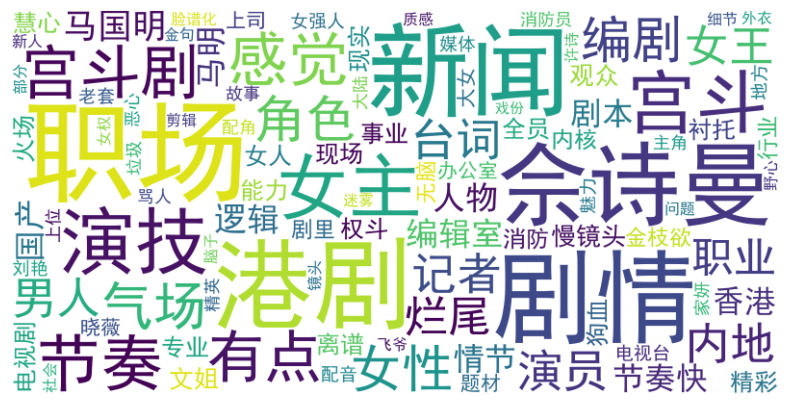

In [19]:

# ÁîüÊàêÂπ∂ÊòæÁ§∫ËØç‰∫ë
generate_wordcloud(all_comments_text)


# 

# ÊÉÖÊÑüÂàÜÊûê

In [20]:

# Ê∑ªÂä†‰∏ÄÂàóÊù•Â≠òÂÇ®ÊÉÖÊÑüÂàÜÊûêÁöÑÁªìÊûúÔºà‰ΩøÁî®SnowNLPÔºâ
df['sentiment'] = df['comments_segmented'].apply(lambda x: SnowNLP(x).sentiments)


In [21]:
# ÊâìÂç∞Â∏¶ÊúâÊÉÖÊÑüÂàÜÊûêÁªìÊûúÁöÑ DataFrame
print(df[['comments_segmented', 'sentiment']])


                                     comments_segmented  sentiment
0     Â§™ ÊµÆÂ§∏ + ÂÖ®Á®ã Ë£Ö b + ÂâßÊú¨ Â§™ÂÅá „ÄÇ Êñ∞ÈóªËÆ∞ËÄÖ ÊØî Ê∂àÈò≤ Ë≠¶ÂØü Ëøò Êó©Âà∞ Áé∞Âú∫ Ôºü...   0.015821
1     Á¨ë Ê≠ª ‰∫Ü Ôºå Â∞èÊ∑∑Ê∑∑ Êó†ÁêÜÂèñÈóπ Ëøò Êä¢ Âè∏Êú∫ ÊñπÂêëÁõò ÊòØ Áõ¥Êé• ÂØºËá¥ ‰∫ãÊïÖ ÂèëÁîü ÁöÑ ÂéüÂõ†...   0.000302
2     Ë¢´ ËØÑËÆ∫ È™ó ËøõÂéª ‰∫Ü   Áúã ‰∫Ü ‰πãÂêé ÂèëÁé∞Ëá™Â∑± ‰πü Êúâ È©¨Â§±ÂâçËπÑ ÁöÑ Êó∂ÂÄô   Ê∏ØÂâß Áîª...   0.997078
3     ÂÜ≤ÁùÄ È©¨ÊòéÂêå Èòø ‰ΩòÂéª ÁöÑ Ôºå ÁªìÊûú Â§ßÂ§±ÊâÄÊúõ „ÄÇ Èòø ‰Ωò ÁúüÁöÑ ‰∏ç ÈÄÇÂêà Ëøô‰∏™ ËßíËâ≤ Ôºå ...   0.993082
4     Áª∑ ‰∏ç‰Ωè ‰∫Ü Ôºå ÂÖ®Á®ã Ëá™Â∏¶ Ë£Ö b ÂÖâÁéØ ‚ûï Ê≤πËÖª Ë°®ÊÉÖ Ôºå ÊÖ¢ÈïúÂ§¥ Ëøô‰πà Â§ö Ôºå Âπ≥Êó∂ ...   0.075909
...                                                 ...        ...
1795                        ÊúâÁÇπ ËÑ±Á¶ªÂÆûÈôÖ Ôºå ÁúüÂÆû ÁöÑ Êñ∞Èóª ‰∏ñÁïå ÊòØ ËøôÊ†∑ ‰πà   0.989967
1796                         Ëøô‰πà‰πÖ ‰∫Ü Ôºå TVB ÁöÑ ÂÆûÂäõ Áªà‰∫é ÂõûÊù• ‰∫Ü „ÄÇ   0.844097
1797  ËØàÈ™ó Âºè Ëê•ÈîÄ ÂìàÂìàÂìà ÂìàÂìà Ôºå Êàë Ëøò ‰ª

In [22]:
df.to_excel("df_sentiment.xlsx")

# Êù•ÁúãÁúãÊÉÖÊÑüÂàÜÊûêÊïàÊûúÂ¶Ç‰Ωï

In [23]:
df.groupby("ratings").sentiment.mean()

ratings
1    0.590736
2    0.682305
3    0.755353
4    0.844787
5    0.821564
Name: sentiment, dtype: float64

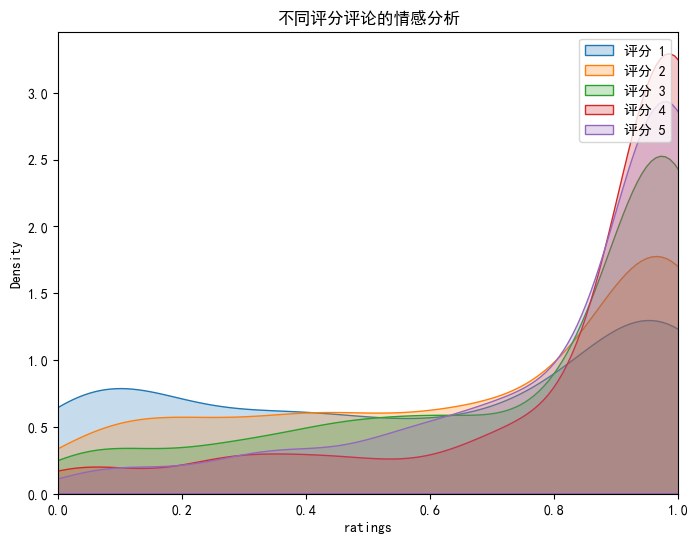

In [24]:

# ‰ΩøÁî®groupbyÂØπÊï∞ÊçÆËøõË°åÂàÜÁªÑ
grouped = df.groupby('ratings')

# ÂàõÂª∫‰∏Ä‰∏™ÁªòÂõæÂå∫Âüü
plt.figure(figsize=(8, 6))

# ÈÅçÂéÜÂàÜÁªÑÂπ∂ÁªòÂà∂Ê†∏ÂØÜÂ∫¶Âõæ
for name, group in grouped:
    sns.kdeplot(group['sentiment'], label=f'ËØÑÂàÜ {name}', shade=True, common_norm=True)

# ËÆæÁΩÆ x ËΩ¥ÁöÑÈôêÂà∂
plt.xlim(0, 1)

# Ê∑ªÂä†Âõæ‰æãÂíåÊ†áÁ≠æ
plt.legend()
plt.title('‰∏çÂêåËØÑÂàÜËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûê')
plt.xlabel('ratings')
plt.ylabel('Density')

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()


# LDAÂàÜÊûê

In [25]:
# Âä†ËΩΩÂÅúÁî®ËØçË°®
stop_words_path = 'stopwords.txt'  # ËØ∑ÊõøÊç¢‰∏∫‰Ω†ÁöÑÂÅúÁî®ËØçË°®Ë∑ØÂæÑ
stop_words = [line.strip() for line in open(stop_words_path, 'r', encoding='utf-8').readlines()]

# ÂàÜËØç
df['comments_segmented'] = df['comments_segmented'].apply(lambda x: [word for word in jieba.cut(x) if word not in stop_words])

# Â∞ÜÂàÜÂ•ΩËØçÁöÑËØÑËÆ∫ÁªÑÊàê‰∏Ä‰∏™ÂàóË°®
documents = df['comments_segmented'].tolist()

# ÂàõÂª∫ËØ≠ÊñôÂ∫ìÂíåÂ≠óÂÖ∏
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(text) for text in documents]

# ÊâßË°åLDAÊ®°Âûã
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# ÊâìÂç∞‰∏ªÈ¢ò
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.001*"üòç" + 0.001*"ÂêπËøá" + 0.001*"‰Ωú‰∏ö" + 0.001*"ÊµÅÊ∞¥Á∫ø" + 0.001*"ËØóÊ∂µ"')
(1, '0.648*" " + 0.005*"Êñ∞Èóª" + 0.004*"Ââß" + 0.004*"ËÅåÂú∫" + 0.003*"ÂâßÊÉÖ"')
(2, '0.001*"3.5" + 0.001*"Â§±Êúõ" + 0.001*"emmmm" + 0.001*"weak" + 0.001*"Êó†Âäü"')


In [26]:
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis

In [27]:
# # ÂàõÂª∫ÂèØËßÜÂåñ
# vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
# pyLDAvis.display(vis_data)